# Matrices

In [19]:
from sympy import init_printing, Matrix, eye, zeros, diag, Symbol
from sympy import __version__ as sympy_version

init_printing() # Pretty printing

print('sympy version is: \t' + str(sympy_version))

sympy version is: 	1.3


## Make a Vector

In [2]:
# Column vector
v = Matrix([
    [1],
    [2],
    [3]
])

# Row vector
u = Matrix([
    [1,2,3]
])


display(v, u)

## Make a Matrix

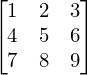

In [3]:
A = Matrix([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

A

## Identity Matrices

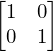

In [4]:
eye(2)

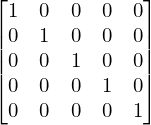

In [5]:
eye(5)

## Zero Matrices

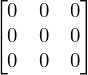

In [6]:
zeros(3)

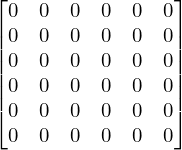

In [7]:
zeros(6)

## Diagonal Matrices

You can pass in a series of values that will be positioned along the diagonal of a square matrix.

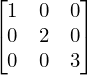

In [8]:
diag(1,2,3)

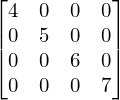

In [9]:
diag(4,5,6,7)

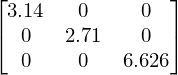

In [10]:
diag(3.14, 2.71, 6.626)

## Access Rows/Columns at a Time

Once you have created a `Matrix`, you can access it's rows and columns with the appropriate method for that object.

There are however two caveats to indexing matrices in python. 
1. Python is 'column-major', meaning if you access a two-dimensional array you specify **column first and then row**. This is the opposite way around as the way we do it with matrices.
2. Numbering starts from `0` in python. So what we would usually refer to as row 1, we will from here on in refer to as row 0.

In [11]:
A = Matrix([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

# Row access
display(A.row(0))

# Column access
display(A.col(0))

# Element-specific indexing
display(A[0,2]) # See, column first, then row.
display(A[2,2])

# You can also access the n-th element in the matrix if you fancy.
display(A[4])

## Want reduced-row-echelon-form (rref)?

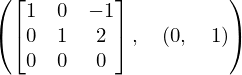

In [12]:
A = Matrix([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

A.rref() # As simple as that!

We can see that two elements were returned. The first is the row-reduced form of $\mathbf{A}$, the other is a `tuple` of the columns of $\mathbf{A}$ that contain pivots.

## Want the inverse of a matrix?

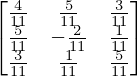

In [13]:
# Resetting A (in case of unordered use of cells)
A = Matrix([
    [1,2,-1],
    [2,-1,-1],
    [-1,-1,3]
])

A.inv() # One-liner!

## Transpose of a matrix?

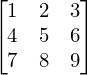

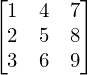

In [14]:
# Resetting A (in case of unordered use of cells)
A = Matrix([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

display(A)
display(A.T) # Note that this is an attribute and not a method (no need for parantheses to call a function).

## Now with row-reductions:

Because `sympy` has automated a lot of the matrix processes, it seems that row operations are not particularly intuitive operations for whatever reason that may be.

The best way to learn this is likely to closely follow the example below and ask questions.

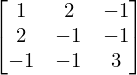

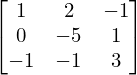

In [15]:
# Resetting A (in case of unordered use of cells)
A = Matrix([
    [1,2,-1],
    [2,-1,-1],
    [-1,-1,3]
])

display(A)

# R1 = R1 - 2*R0                          .  < That dot is above the row number you're subtracting.
A.row_op(1, lambda one, row_el: one - 2*A[0,row_el])
#                                            ^ This is a varaible to allow sympy to iterate over all row elements
display(A)

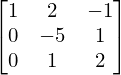

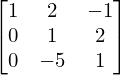

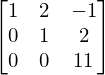

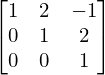

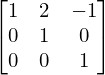

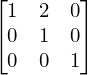

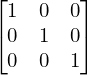

In [16]:
# R2 = R2 + R0
A.row_op(2, lambda two, row_el: two + A[0,row_el])
display(A)


# R1 <--> R2
A.row_swap(1,2)
display(A)


# R2 = R2 + 5*R1
A.row_op(2, lambda two, row_el: two + 5*A[1, row_el])
display(A)


# R2 = (1/11)*R2
A.row_op(2, lambda two, row_el: int((1/11)*A[2,row_el]))
display(A)


# R1 = R1 - 2*R2
A.row_op(1, lambda one, row_el: one - 2*A[2,row_el])
display(A)


# R0 = R0 + R2
A.row_op(0, lambda zero, row_el: zero+ A[2, row_el])
display(A)


# R0 = R0 -2*R1
A.row_op(0, lambda zero, row_el: zero -2*A[1, row_el])
display(A)

### Invert a Matrix to Solve 
$$
\mathbf{Ax}=\mathbf{b} \quad \Rightarrow \quad 
\mathbf{x}=\mathbf{A^{-1}b}
$$

In [17]:
# Changing A
A = Matrix([
    [1,2,-1],
    [2,-1,-1],
    [-1,-1,3]
])

# Right-hand side of the equation
b = Matrix([
    5,
    0,
    8
])

# Solving the equation.
x = A.inv()*b

display(x)

## Symbolic Matrices

The useful thing about some calculations is specifying a value in your matrix so that some property is true.

E.g.

Determine the value of $c$ so that $\mathbf{A}$ has a determinant of 0.

$$
\mathbf{A} = 
\begin{bmatrix}
    c & 2 & 1 \\
    5      & -1 & 2 \\
    -3     & 1 & -1 \\
\end{bmatrix}
$$

'A is: '

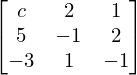

'Det(A) = '

In [20]:
c = Symbol('c')

A = Matrix([
    [c,2,1],
    [5,-1,2],
    [-3,1,-1]
])

display('A is: ', A)


display('Det(A) = ', A.det())

So if:
$$\text{det}(\mathbf{A}) = 0$$
then $$-c=0 \quad \text{ and so } \quad c=0$$ 

for the matrix to have a determinant of zero.

A matrix with a zero determinant is called a 'singular' matrix.

## Eigenvalues & Eigenvectors

An eigenvalue and eigenvector are solutions to the following equation:

$$
\mathbf{Ax}
=
\lambda
\mathbf{x}
$$

Where $\lambda$ is an _eigen**value**_ and $\mathbf{x}$ is an _eigen**vector**_.



* The direction of an _eigen**vector**_ is unchanged, but its magnitude may not be.

* So we can say that $\mathbf{x}$ is a vector who's direction is unchanged by the linear transformation, $\mathbf{A}$.

* The _eigen**value**_ is how much the magnitude of the _eigen**vector**_ is changed.

The approach is to:

1. Find the _eigen**values**_.
2. Use each _eigen**value** to find one _eigen**vector**_.

### Eigenvalues

In [35]:
A = Matrix([
    [1,2],
    [2,4]
])

e_vals = A.eigenvals()

print('Type of object: \t' + str(type(e_vals)))

Type of object: 	<class 'dict'>


So the `eigenval` method has returned us a `dictionary` object. So, what are the `keys` and `values`?

In [29]:
e_vals.keys()

dict_keys([5, 0])

In [30]:
e_vals.values()

dict_values([1, 1])

In [31]:
display(e_vals)

The eigenvalues: $\lambda_1 = 0$ and $\lambda_2=5$ are the `keys` of the `dictionary`. The `values` in that `dictionary` are the 'multiplicity' of that eigenvalue, meaning how many times that eigenvalue occurred. For both values, their multiplicity is one.

### Eigenvectors

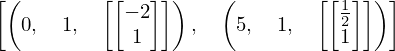

In [34]:
# Resetting A (in case of unordered cells).
A = Matrix([
    [1,2],
    [2,4]
])

A.eigenvects()

From the `eigenvects` method we are returned a `list` containing `tuples`.

We also have the information we previously gathered (the eigenvalues) as well as the requested eigenvectors.

Interpretting the first element of the `list`:

The eigenvalue $\lambda_1 = 0$ with multiplicity $1$ is used to obtain the vector $\begin{bmatrix} -2 \\ 1 \end{bmatrix}$.

And interpretting the second value in the `list`:

The eigenvalue $\lambda_2 = 5$ with multiplicity $1$ is used to obtain the vector $\begin{bmatrix} 1/2 \\ 1 \end{bmatrix}$.

# -------- Questions --------

## Question 1:



## Answer 1:


## Question 2:



## Answer 2:

## Question 3:

Determine the eigenvalues and vectors of:

$$
\mathbf{Q}
=
\begin{bmatrix}
0 & 1 \\
-1 & 0 \\
\end{bmatrix}
$$

## Answer 3:

## Question $n$:



## Answer $n$:

# -------- Additional Questions --------

## Additional Question 1:

What is meant by a 'pivot'?